In [ ]:
from keras.models import load_model
import numpy as np

In [ ]:
import urllib.request
import os
import zipfile

def download_from_url(file_url):
  filename = file_url.split('/')[-1]
  destination_path = os.path.join("/content", "dataset", filename)

  if not os.path.exists(destination_path):
    urllib.request.urlretrieve(file_url, destination_path)
    unzipped_destination_path = destination_path.replace(".zip", "")

    with zipfile.ZipFile(destination_path, 'r') as zip_ref:
        zip_ref.extractall(unzipped_destination_path)
        os.remove(destination_path)

In [ ]:
os.mkdir("/content/dataset")
download_from_url("https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip")

In [ ]:
import cv2 as cv

def load_test_images(current_path):
  images = []
  labels = []

  classes = 43

  all_files = [os.path.join(current_path, f) for f in os.listdir(current_path) if os.path.isfile(os.path.join(current_path, f))]
  for f in all_files:
      try:
          image = cv.imread(f)
          image = cv.resize(image, (32, 32))
          image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
          image = np.array(image)
          images.append(image)
      except Exception as e:
          pass

  images = np.array(images)
  images = images/255

  print('Images shape:', images.shape)

  return images

In [ ]:
class_maps = {
    0: "Limita 20",
    1: "Limita 30",
    2: "Limita 50",
    3: "Limita 60",
    4: "Limita 70",
    5: "Limita 80",
    6: "Sfarsit Limita 80",
    7: "Limita 100",
    8: "Limita 120",
    9: "Depasire interzisa",
    10: "Depășirea interzisă autovehiculelor destinate transportului de mărfuri",
    11: "Intersectare cu drum fara prioritate",
    12: "Drum cu prioritate",
    13: "Cedeaza trecerea",
    14: "Stop",
    15: "Accesul interzis",
    16: "Interzis autovehiculelor destinate transportului de marfuri",
    17: "Access interzis",
    18: "Alte pericole",
    23: "Drum lunecos",
    25: "Lucrari",
    26: "Intersectie semaforizata",
    28: "Copii",
    33: "Obligatoriu la dreapta",
    34: "Obligatoriu la stanga",
    35: "Inainte",
    38: "Ocolire prin dreapta",
    40: "Sens giratoriu",
    41: "Sfarsit indicatorului depasirea interzisa",
    42: "Sfarsitul indicatorului depășirea interzisă autovehiculelor destinate transportului de mărfuri"
}

In [ ]:
test_images = load_test_images("/content/dataset/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images")

Images shape: (12630, 32, 32)


# **Predictiile primului model**

In [ ]:
import random
import matplotlib.pyplot as plt
import textwrap

def plot_preds(preds):
  plt.figure(figsize=(60, 60))
  start_index = random.randint(0, 7800)
  for i in range(9):
      plt.subplot(9, 1, i+1)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])

      pred = np.argmax(preds[start_index+i])
      plt.xlabel('i={}\n{}'.format(start_index + 1, class_maps.get(pred, pred), width=15))
      plt.imshow(test_images[start_index+i], cmap='gray')
  plt.show()

395/395 [==============================] - 1s 3ms/step


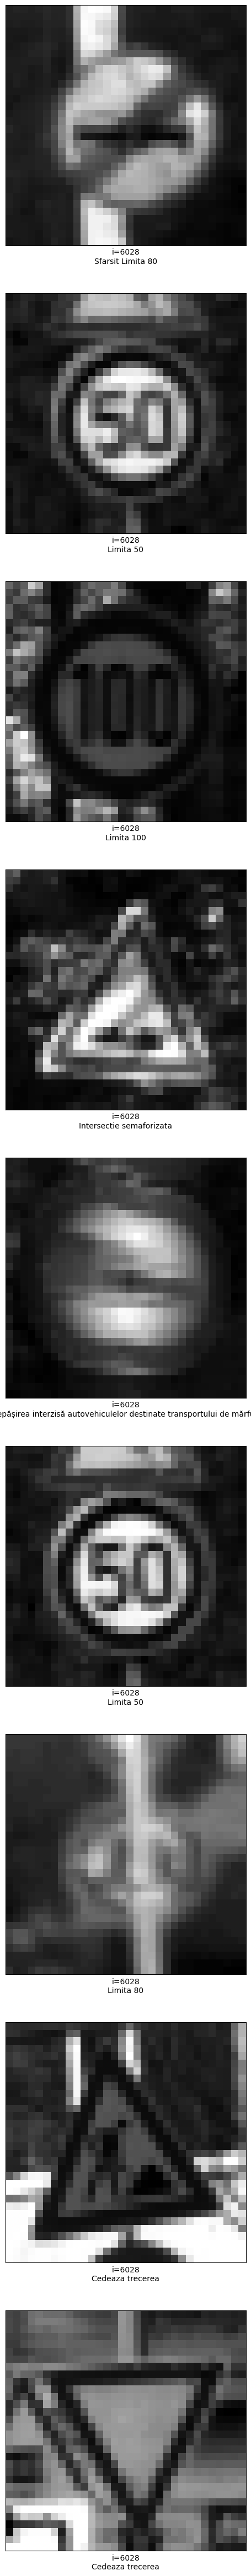

In [ ]:
model = load_model("/content/first_model/first_model.h5")
preds = model.predict(test_images)

plot_preds(preds)

# **Predictiile modelului final**

395/395 [==============================] - 3s 7ms/step


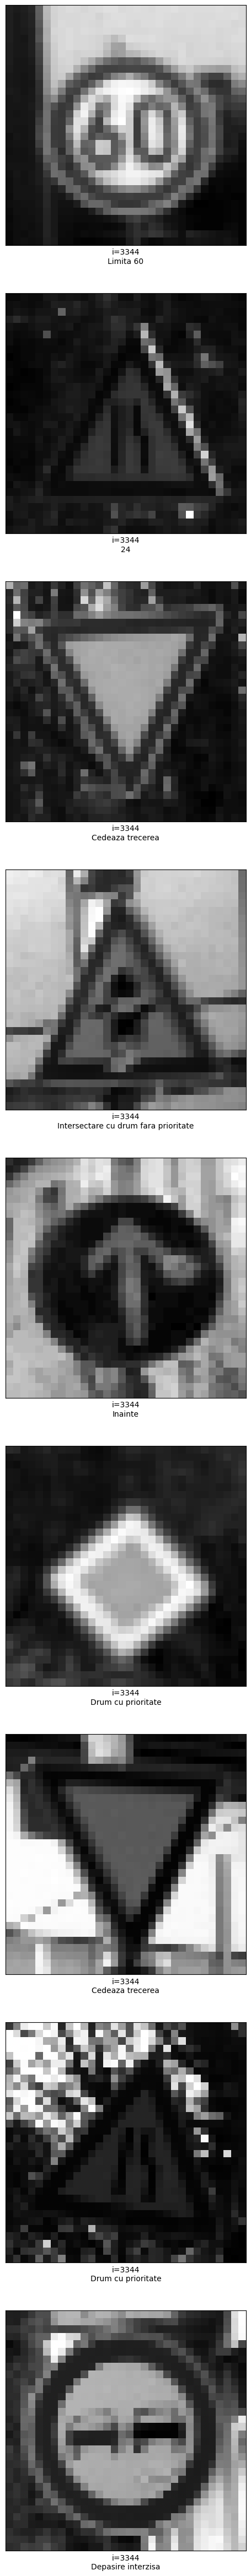

In [ ]:
model = load_model("/content/final_model/final_model.h5")
preds = model.predict(test_images)

plot_preds(preds)